<a href="https://colab.research.google.com/github/rodrigofardin/Reconhecimento-de-Padroes/blob/main/ClassificacaoQSAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Carregando uma base de dados de regressão que NÃO esteja nos toy datasets do scikit-learn;

A base de dados escolhida foi o conjunto de dados de biodegradação da QSAR, disponível no OpenML.

In [2]:
from sklearn.datasets import fetch_openml
dataset = fetch_openml(data_id=1494)

In [3]:
print(dataset.DESCR)

**Author**: Kamel Mansouri, Tine Ringsted, Davide Ballabio  
**Source**: [UCI](https://archive.ics.uci.edu/ml/datasets/QSAR+biodegradation)  
**Please cite**: Mansouri, K., Ringsted, T., Ballabio, D., Todeschini, R., Consonni, V. (2013). Quantitative Structure - Activity Relationship models for ready biodegradability of chemicals. Journal of Chemical Information and Modeling, 53, 867-878 


QSAR biodegradation Data Set 

* Abstract: 

Data set containing values for 41 attributes (molecular descriptors) used to classify 1055 chemicals into 2 classes (ready and not ready biodegradable).


* Source:

Kamel Mansouri, Tine Ringsted, Davide Ballabio (davide.ballabio '@' unimib.it), Roberto Todeschini, Viviana Consonni, Milano Chemometrics and QSAR Research Group (http://michem.disat.unimib.it/chm/), UniversitÃ  degli Studi Milano â€“ Bicocca, Milano (Italy)


* Data Set Information:

The QSAR biodegradation dataset was built in the Milano Chemometrics and QSAR Research Group (UniversitÃ  deg

In [4]:
X, y = dataset.data, dataset.target
print(X.shape, y.shape)

(1055, 41) (1055,)


Criando as matrizes de dados X e y

In [5]:
print(dataset.data[:].shape)

(1055, 41)


Base de dados que será trabalhada

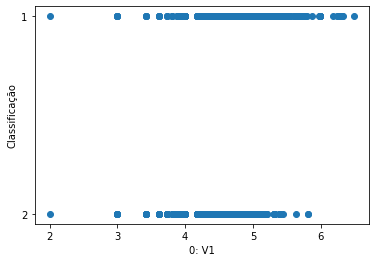

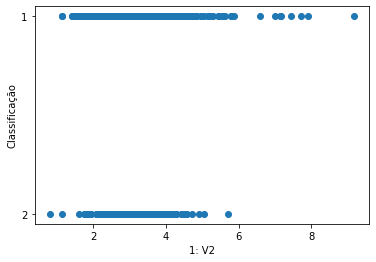

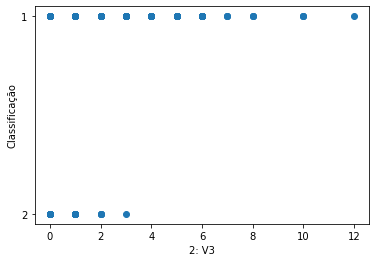

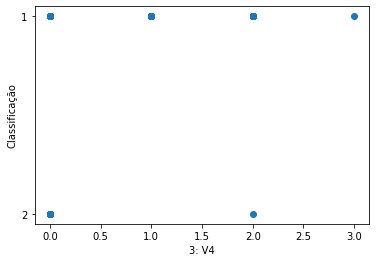

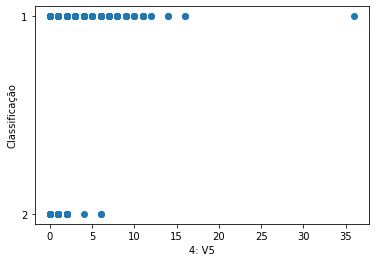

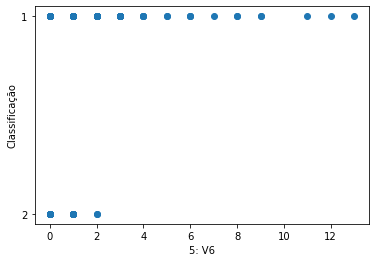

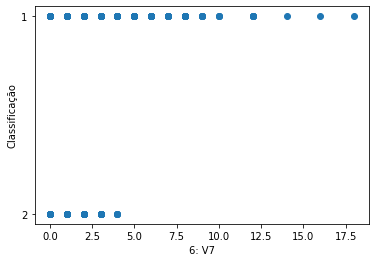

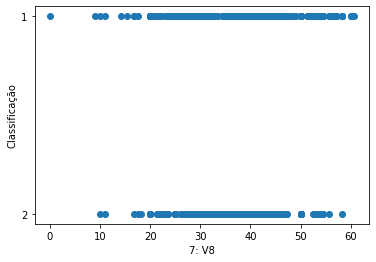

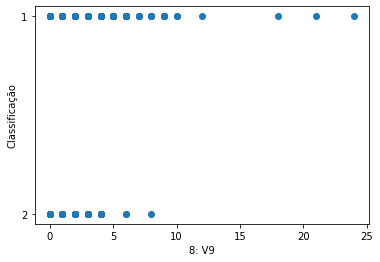

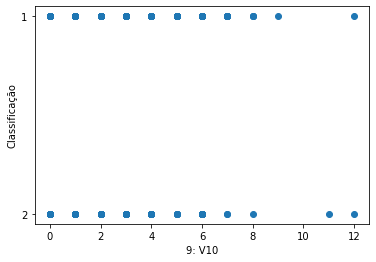

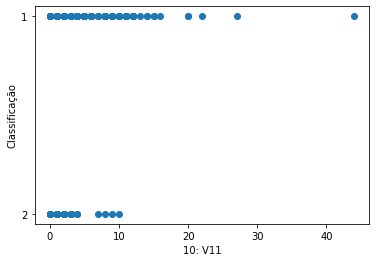

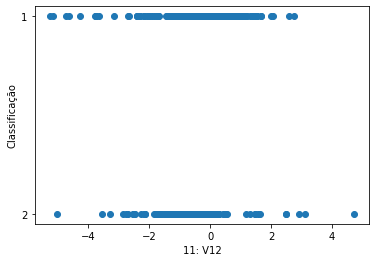

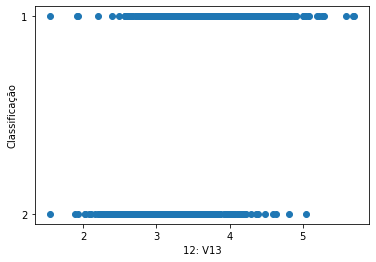

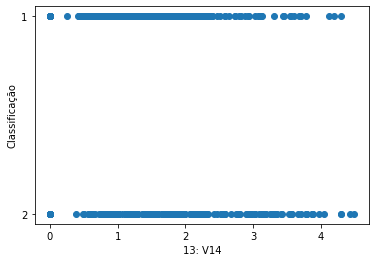

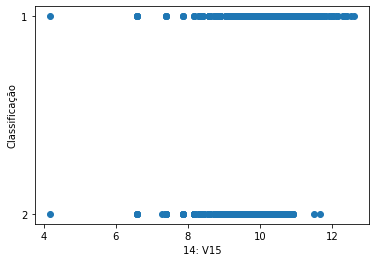

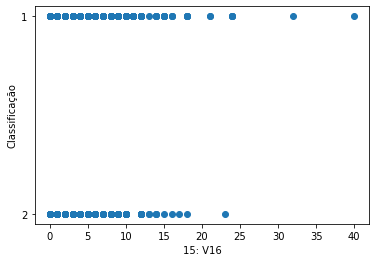

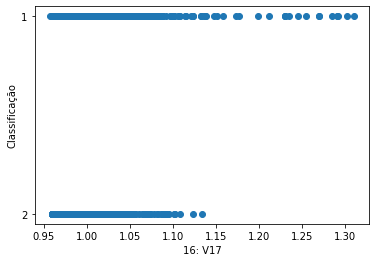

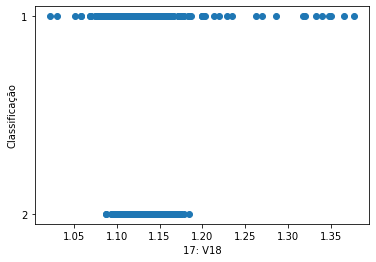

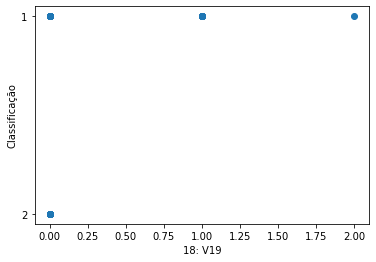

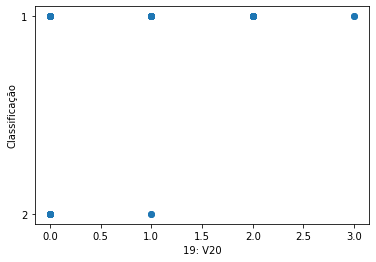

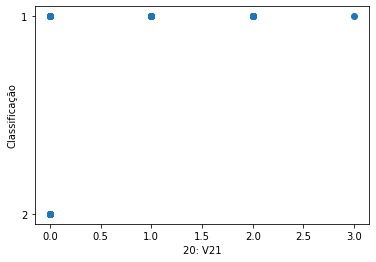

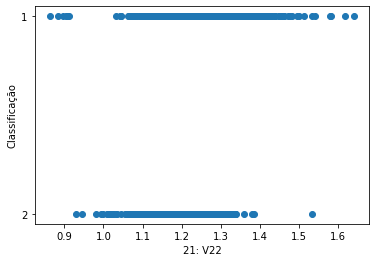

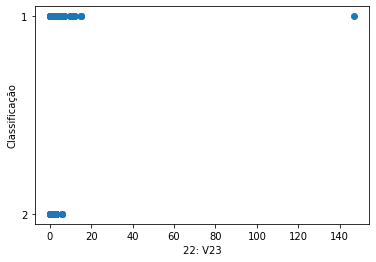

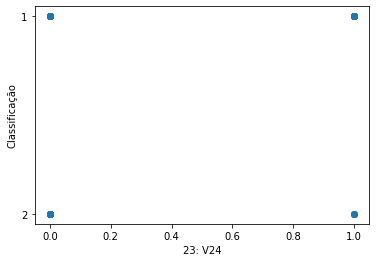

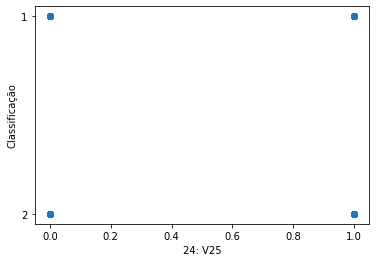

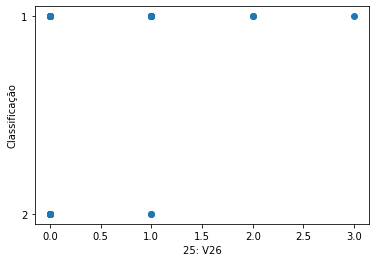

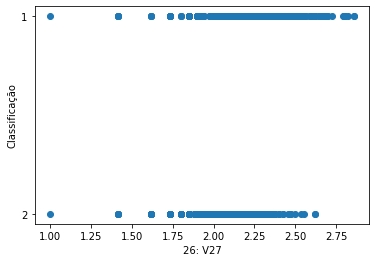

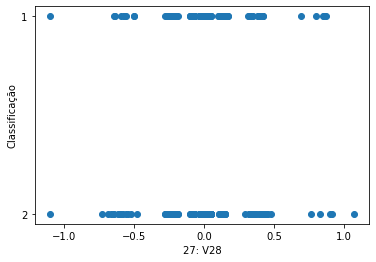

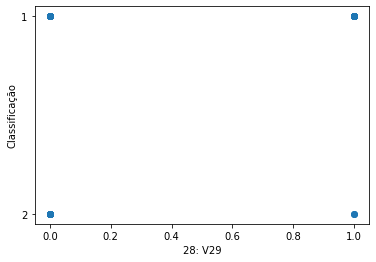

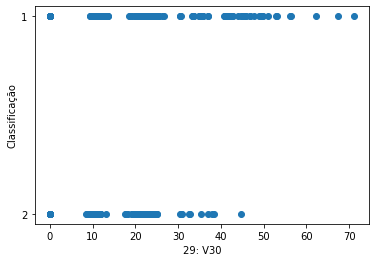

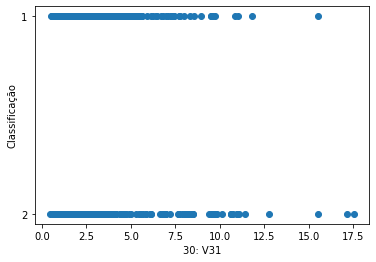

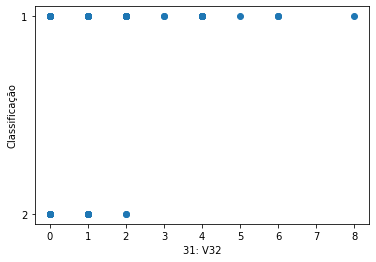

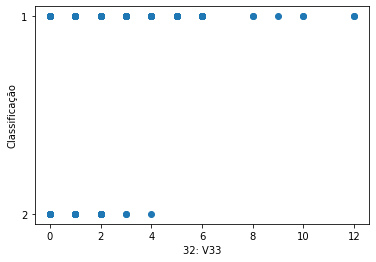

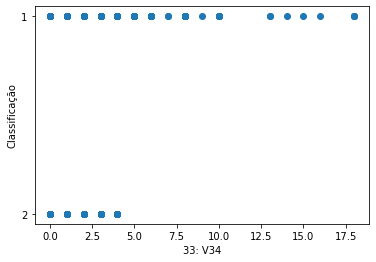

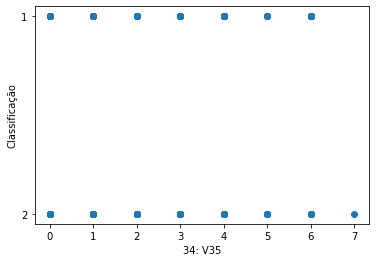

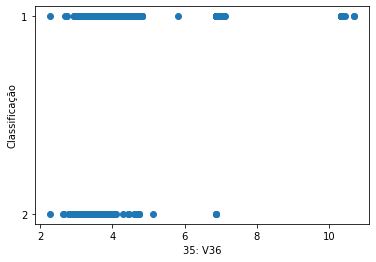

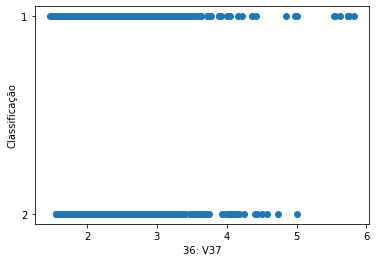

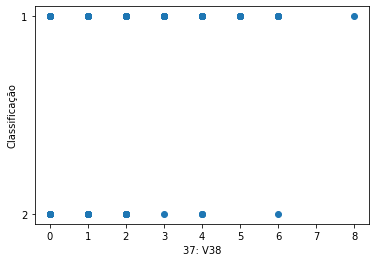

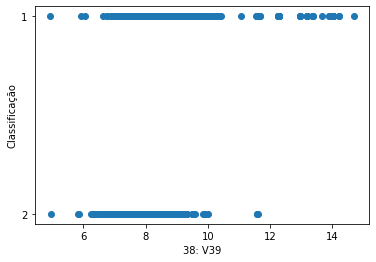

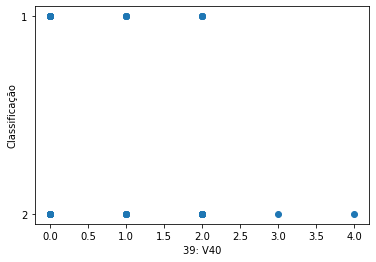

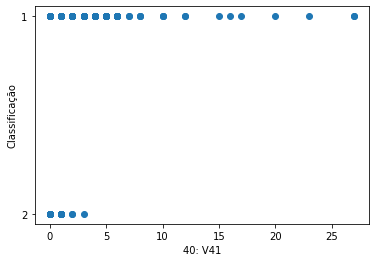

In [7]:
import matplotlib.pyplot as plt
for i in range(X.shape[1]):
  plt.xlabel(f"{i}: {dataset.feature_names[i]}")
  plt.ylabel("Classificação")
  plt.scatter(X.iloc[:,i],y)
  plt.show()

**Modelo de Classificação**

Definindo o modelo de Regressão Logística

In [8]:
from sklearn.linear_model import LogisticRegression
modelo = LogisticRegression(max_iter=1000)

In [9]:
modelo.fit(X, y)
ypred = modelo.predict(X)
ypred.shape

(1055,)


Visualização das predições que o modelo gerou, com os mesmos dados que criaram o modelo.

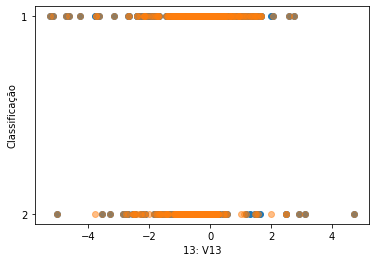

In [10]:
X13 = X.iloc[:,11:12]
plt.xlabel(f"{13}: {dataset.feature_names[12]}")
plt.ylabel("Classificação")
plt.scatter(X13, y)
plt.scatter(X13, ypred, alpha=0.5)
plt.show()

Calculando o MSE (erro quadrático médio)

In [11]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, ypred)
print(mse)

0.12037914691943127


Calculando o MAE (Erro Absoluto Médio)

In [12]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y, ypred)
print(mae)

0.12037914691943127


Calculando o RMSE (Raiz Quadrada do Erro Médio)

In [13]:
rmse = mean_squared_error(y, ypred, squared=False)
print(rmse)

0.34695698136718806


Calculando a Acurácia do modelo

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y, ypred)

0.8796208530805687

Utilizando os atributos coef_ e intercept_ do modelo, sendo eles respectivamente o coeficiente dos recursos na função de decisão e o bias

In [15]:
print(modelo.intercept_,'\n', modelo.coef_)

[0.08517126] 
 [[-0.81682043 -0.74231828 -0.572232    0.19375375 -0.1982126  -1.61091915
  -0.95624312  0.12648846  0.07076173  0.35686511  0.1096547   0.3656588
  -1.34639099  0.74590437  0.68484848 -0.10362922  0.04411864 -0.04815334
  -1.30012456 -1.37587472 -0.09193963 -0.14644345 -0.09774301  0.70793573
  -0.48674502  0.93988887 -0.23479429 -0.31462727  0.16307126  0.05433322
   0.03056245 -1.33821928  0.10060461 -0.40983027  0.36675797  0.37852995
   1.25455334 -0.69933954 -0.61347324  1.01585723 -0.35117683]]


Plotando os gráficos (2D) do MSE em função do atributo intercept_ da classe LogisticRegression. Mantendo os valores do atributo coef_ fixos e variando o valor de intercept_ entre intercept_ - delta e intercept_ + delta.
O gráfico do erro da classificação, muito provavelmente, não terá a aparência "bem comportada" que o gráfico do erro de regressão. Por isso, você será encontrar 3 deltas (um para cada gráfico).

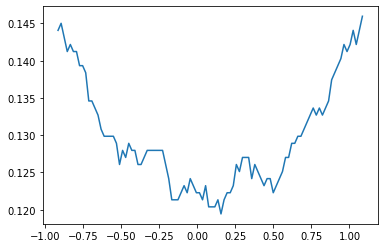

In [16]:
import numpy as np

def plot(delta):
  erros = []
  intercept = modelo.intercept_
  ws = np.linspace(intercept-delta, intercept+delta, 100)
  for w in ws:
    modelo.intercept_= w
    ypred = modelo.predict(X)
    erro = mean_squared_error(y, ypred)
    erros.append(erro)
  modelo.intercept_ = intercept
  plt.plot(ws, erros)
  plt.show()

plot(1)

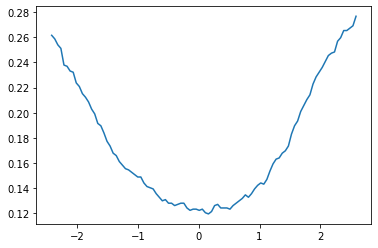

In [36]:
import numpy as np

def plot(delta):
  erros = []
  intercept = modelo.intercept_
  ws = np.linspace(intercept-delta, intercept+delta, 100)
  for w in ws:
    modelo.intercept_= w
    ypred = modelo.predict(X)
    erro = mean_squared_error(y, ypred)
    erros.append(erro)
  modelo.intercept_ = intercept
  plt.plot(ws, erros)
  plt.show()

plot(2.5)

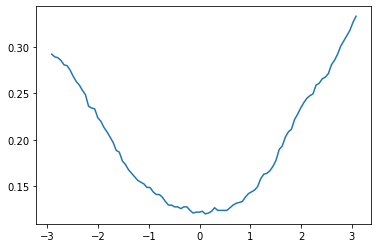

In [32]:
import numpy as np

def plot(delta):
  erros = []
  intercept = modelo.intercept_
  ws = np.linspace(intercept-delta, intercept+delta, 100)
  for w in ws:
    modelo.intercept_= w
    ypred = modelo.predict(X)
    erro = mean_squared_error(y, ypred)
    erros.append(erro)
  modelo.intercept_ = intercept
  plt.plot(ws, erros)
  plt.show()

plot(3)

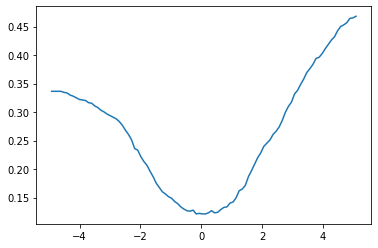

In [17]:
import numpy as np

def plot(delta):
  erros = []
  intercept = modelo.intercept_
  ws = np.linspace(intercept-delta, intercept+delta, 100)
  for w in ws:
    modelo.intercept_= w
    ypred = modelo.predict(X)
    erro = mean_squared_error(y, ypred)
    erros.append(erro)
  modelo.intercept_ = intercept
  plt.plot(ws, erros)
  plt.show()

plot(5)